In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
def f(x, y):
  return 3*x**2 + 3*y**2 + 1

def dfdx(x, y):
  return 6*x

def dfdy(x, y):
  return 6*y

def grad_vector(x, y):
  return np.array([dfdx(x, y), dfdy(x, y)])

<ipython-input-3-16b8fc4dab3f>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


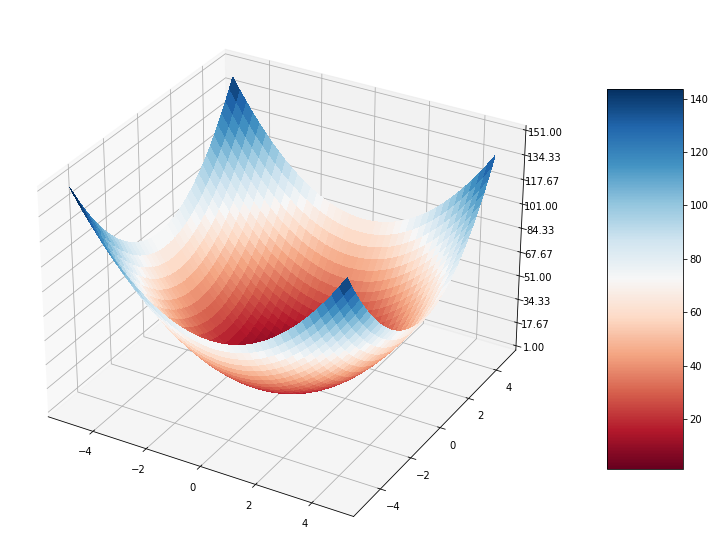

In [ ]:
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure(1, figsize = (20, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

In [ ]:
def grad_descent_momentum(df,x_prev,learn_rate,betta):
    
  epsilon = 0.0001
  grad_itter = 1
    
  seq_x = []
  seq_y = []

  V_t = (1-betta)*df(x_prev[0],x_prev[1])
  x_next = x_prev - learn_rate*V_t
  seq_x = np.append(seq_x, x_next[0])
  seq_y = np.append(seq_y, x_next[1])
    
  while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
      x_prev = x_next
      V_t = betta*V_t + (1-betta)*df(x_prev[0],x_prev[1])
      x_next = x_prev - learn_rate*V_t
      grad_itter += 1
        
      seq_x = np.append(seq_x, x_next[0])
      seq_y = np.append(seq_y, x_next[1])
  
  return (x_next, grad_itter, seq_x, seq_y)

In [ ]:
from numpy.ma.core import sqrt
def adam(df,x_prev,learn_rate,betta_1, betta_2, e):

  epsilon = 0.0001
  grad_itter = 1

  seq_x = []
  seq_y = []

  V_t = (1-betta_1)*df(x_prev[0],x_prev[1])
  S_t = (1-betta_2)*df(x_prev[0],x_prev[1])**2
  x_next = x_prev - learn_rate*(V_t/(1 - betta_1**grad_itter))/(sqrt(S_t/(1 - betta_2**grad_itter)) + e)
  seq_x = np.append(seq_x, x_next[0])
  seq_y = np.append(seq_y, x_next[1])
    
  while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
    x_prev = x_next
    V_t = betta_1*V_t + (1-betta_1)*df(x_prev[0],x_prev[1])
    S_t = betta_2*S_t + (1-betta_2)*df(x_prev[0],x_prev[1])**2
    grad_itter += 1
    x_next = x_prev - learn_rate*(V_t/(1 - betta_1**grad_itter))/(sqrt(S_t/(1 - betta_2**grad_itter)) + e)
        
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])

  return (x_next, grad_itter, seq_x, seq_y)

Minimum (x,y) from gradient descent: [0.00338376 0.00112792]
Number of gradient descent iterations: 142


<Figure size 432x288 with 0 Axes>

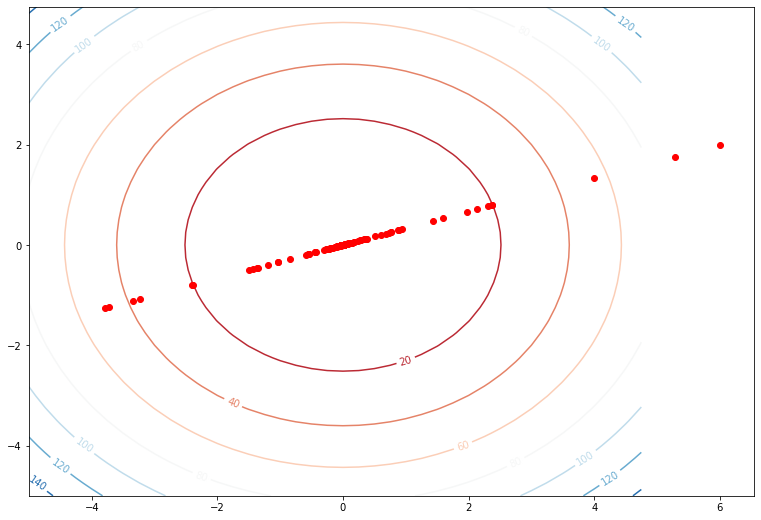

In [ ]:
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    plt.figure(figsize=(13, 9))
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

grad_output = grad_descent_momentum(grad_vector, np.array([6,2]), 0.2, 0.9)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

Minimum (x,y) from gradient descent: [0.0017286874648696905 0.00046997697705725665]
Number of gradient descent iterations: 156


<Figure size 432x288 with 0 Axes>

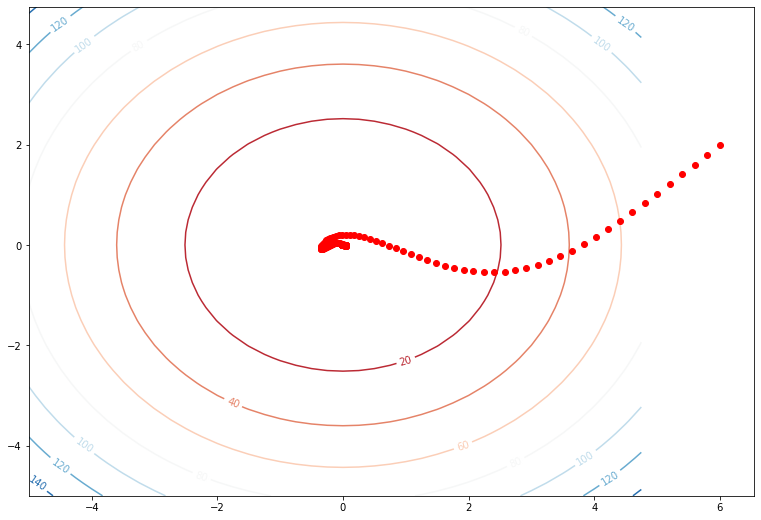

In [ ]:
def contour_plot(x_seq,y_seq, x1):
    plt.figure(1)
    plt.figure(figsize=(13, 9))
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

grad_output = adam(grad_vector, np.array([6,2]), 0.2, 0.9, 0.999, 10**(-8))

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

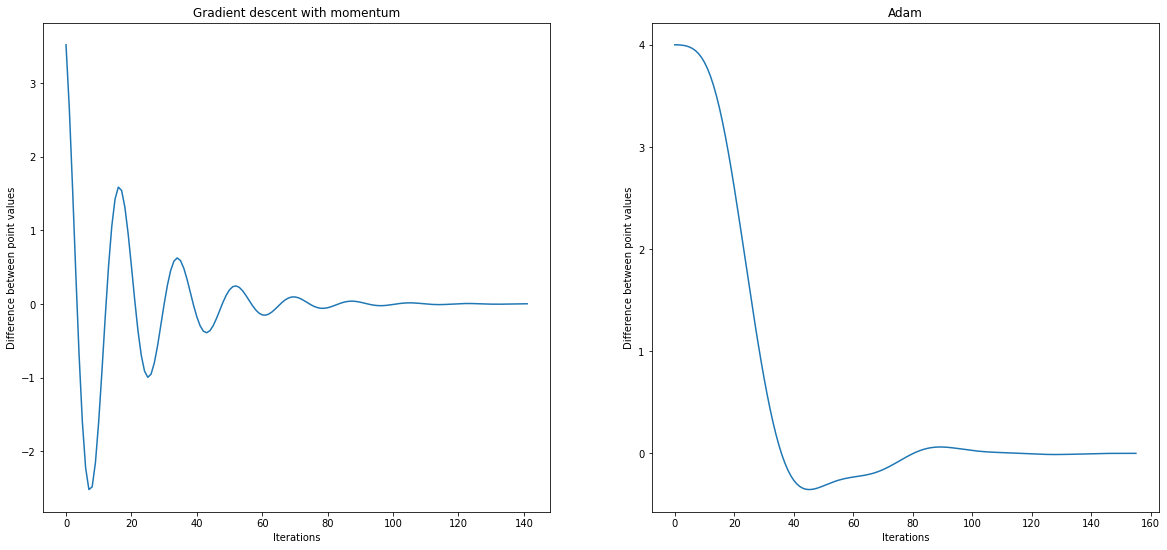

In [ ]:
grad_output_momentum = grad_descent_momentum(grad_vector, np.array([6,2]), 0.2, 0.9)
grad_output_adam = adam(grad_vector, np.array([6,2]), 0.2, 0.9, 0.999, 10**(-8))

a = np.array([x-y for (x, y) in zip(grad_output_momentum[2], grad_output_momentum[3])])
b = np.array([x-y for (x, y) in zip(grad_output_adam[2], grad_output_adam[3])])

plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
plt.plot(list(range(grad_output_momentum[1])), a)
plt.title("Gradient descent with momentum")
plt.xlabel("Iterations")
plt.ylabel("Difference between point values")


plt.subplot(1,2,2)
plt.plot(list(range(grad_output_adam[1])), b)
plt.title("Adam")
plt.xlabel("Iterations")
plt.ylabel("Difference between point values")

plt.show()

Gradient descent with momentum modulo distances between points is smaller than Adam's. That is, Adam can be called more efficient, since he can reach the minimum faster for a certain given accuracy. In our case, gradient descent worked faster (142 vs. 156 iterations), perhaps due to the accuracy we set at 0.0001. However, Adam did better in our case when viewed in terms of accuracy ([0.0017286874648696905, 0.00046997697705725665] vs. [0.00338376 0.00112792]).